# 边缘检测算子Marr-Hildreth(LOG)

In [2]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt

In [3]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [8]:
def gen_log_kernel(kvalue,delta):
    kerlen = kvalue >> 1
    kernel = np.zeros((kvalue,kvalue))
    for i in range(-kerlen,kerlen+1):
        for j in range(-kerlen,kerlen+1):
            kernel[i+kerlen,j+kerlen] = np.exp(-(i * i + j * j)/(2 * delta * delta)) *\
            (i * i + j * j - 2 * delta * delta) / (delta ** 4)
    return kernel

In [18]:
kernel = gen_log_kernel(3,1)

In [19]:
print(kernel)

[[ 0.         -0.60653066  0.        ]
 [-0.60653066 -2.         -0.60653066]
 [ 0.         -0.60653066  0.        ]]


In [27]:
def log_edge_detect(src,kvalue,delta):
    rows,cols = src.shape
    kernel = gen_log_kernel(kvalue,delta)
    keroffset = kvalue >> 1
    srcf = src.astype(np.float32)
    lap = cv2.filter2D(srcf,-1,kernel)
    dst = np.zeros_like(lap)
    # 邻域判定
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if lap[i - 1,j] * lap[i+1,j] < 0:
                dst[i,j] = 255
            if lap[i,j+1] * lap[i,j-1] < 0:
                dst[i,j] = 255
            if lap[i+1,j+1] * lap[i-1,j-1] < 0:
                dst[i,j] = 255
            if lap[i-1,j+1] * lap[i+1,j-1] < 0:
                dst[i,j] = 255
    print(dst)
    return dst.astype(np.uint8)

In [28]:
dst = log_edge_detect(gray,5,2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


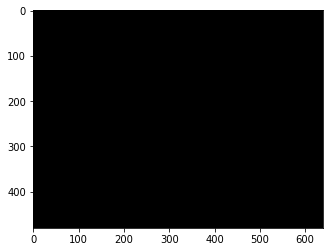

In [29]:
plt.imshow(dst,'gray')

参考：

[1]. https://blog.csdn.net/a664607530/article/details/79318564